In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Read in the csv
df = pd.read_csv("../data/raw/beer_reviews.csv")
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
# Summary Statistics
print(df.describe(include='all'))

          brewery_id                        brewery_name   review_time   
count   1.586614e+06                             1586599  1.586614e+06  \
unique           NaN                                5742           NaN   
top              NaN  Boston Beer Company (Samuel Adams)           NaN   
freq             NaN                               39444           NaN   
mean    3.130099e+03                                 NaN  1.224089e+09   
std     5.578104e+03                                 NaN  7.654427e+07   
min     1.000000e+00                                 NaN  8.406720e+08   
25%     1.430000e+02                                 NaN  1.173224e+09   
50%     4.290000e+02                                 NaN  1.239203e+09   
75%     2.372000e+03                                 NaN  1.288568e+09   
max     2.800300e+04                                 NaN  1.326285e+09   

        review_overall  review_aroma  review_appearance review_profilename   
count     1.586614e+06  1.586614e

In [7]:
# Missing Values
print(df.isnull().sum())

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [8]:
# Unique Values
for col in df.columns:
    print(f'Unique values in {col}: {df[col].nunique()}')

Unique values in brewery_id: 5840
Unique values in brewery_name: 5742
Unique values in review_time: 1577960
Unique values in review_overall: 10
Unique values in review_aroma: 9
Unique values in review_appearance: 10
Unique values in review_profilename: 33387
Unique values in beer_style: 104
Unique values in review_palate: 9
Unique values in review_taste: 9
Unique values in beer_name: 56857
Unique values in beer_abv: 530
Unique values in beer_beerid: 66055


array([[<Axes: title={'center': 'brewery_id'}>,
        <Axes: title={'center': 'review_time'}>,
        <Axes: title={'center': 'review_overall'}>],
       [<Axes: title={'center': 'review_aroma'}>,
        <Axes: title={'center': 'review_appearance'}>,
        <Axes: title={'center': 'review_palate'}>],
       [<Axes: title={'center': 'review_taste'}>,
        <Axes: title={'center': 'beer_abv'}>,
        <Axes: title={'center': 'beer_beerid'}>]], dtype=object)

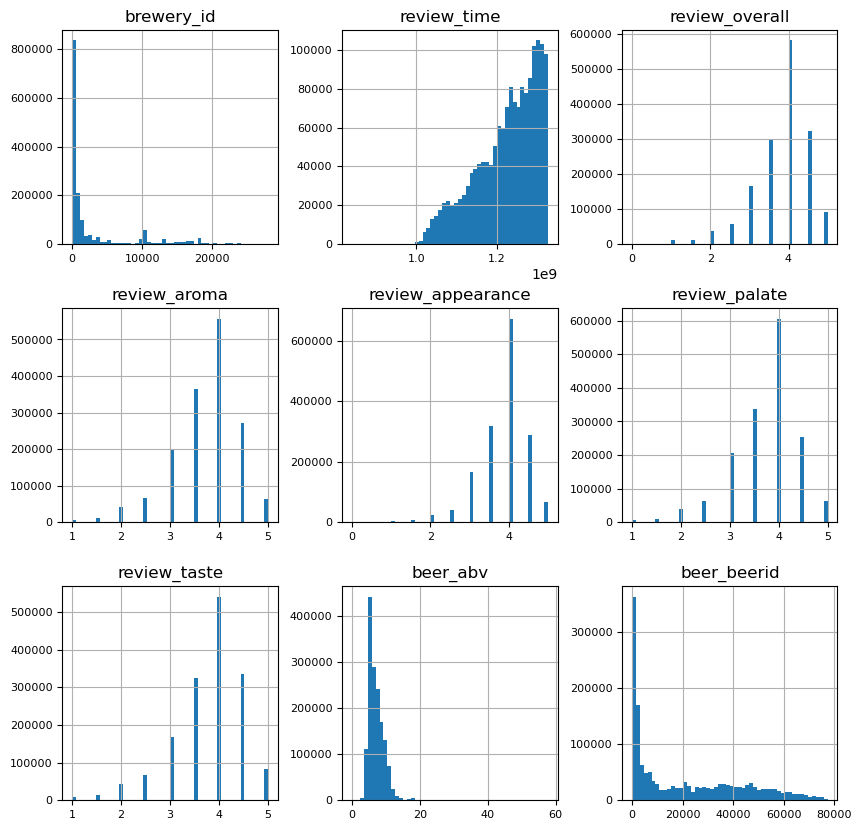

In [9]:
# Histograms
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

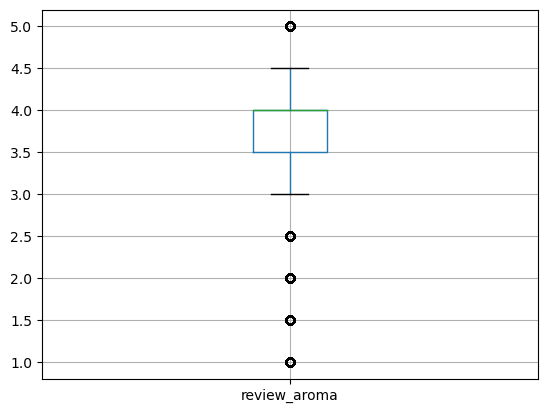

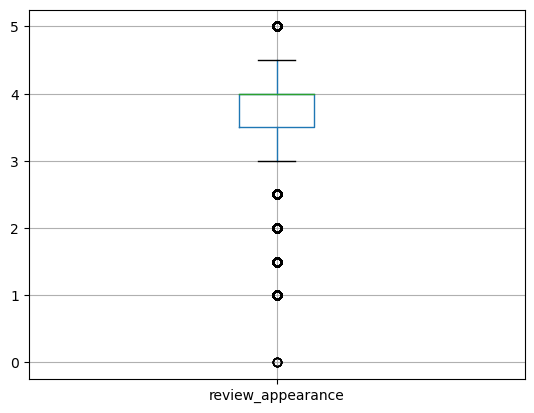

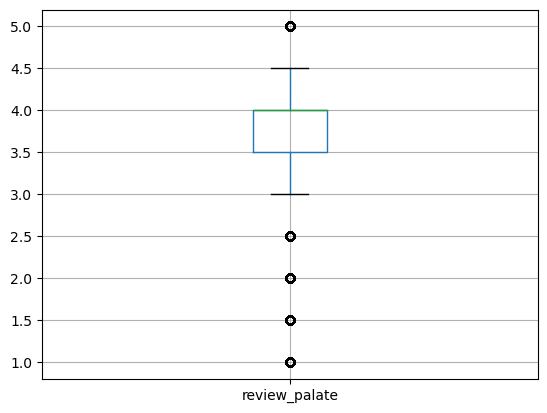

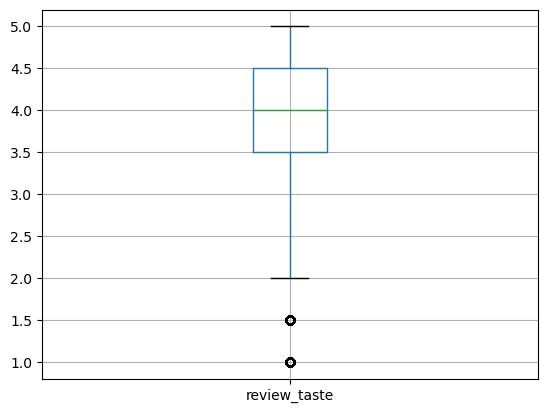

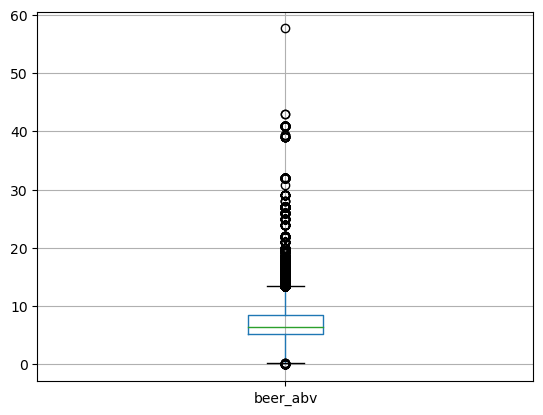

In [10]:
# Box Plots
for col in ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']:
    df.boxplot(column=col)
    plt.show()

/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Glyph 154 (\x9a) missing from current font.
  plt.tight_layout()
/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
/var/folders/h_/ylqt_b5x3pl7qmv6m2b0dxhr0000gn/T/ipykernel_33062/237668508.py:35: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
/var/folders

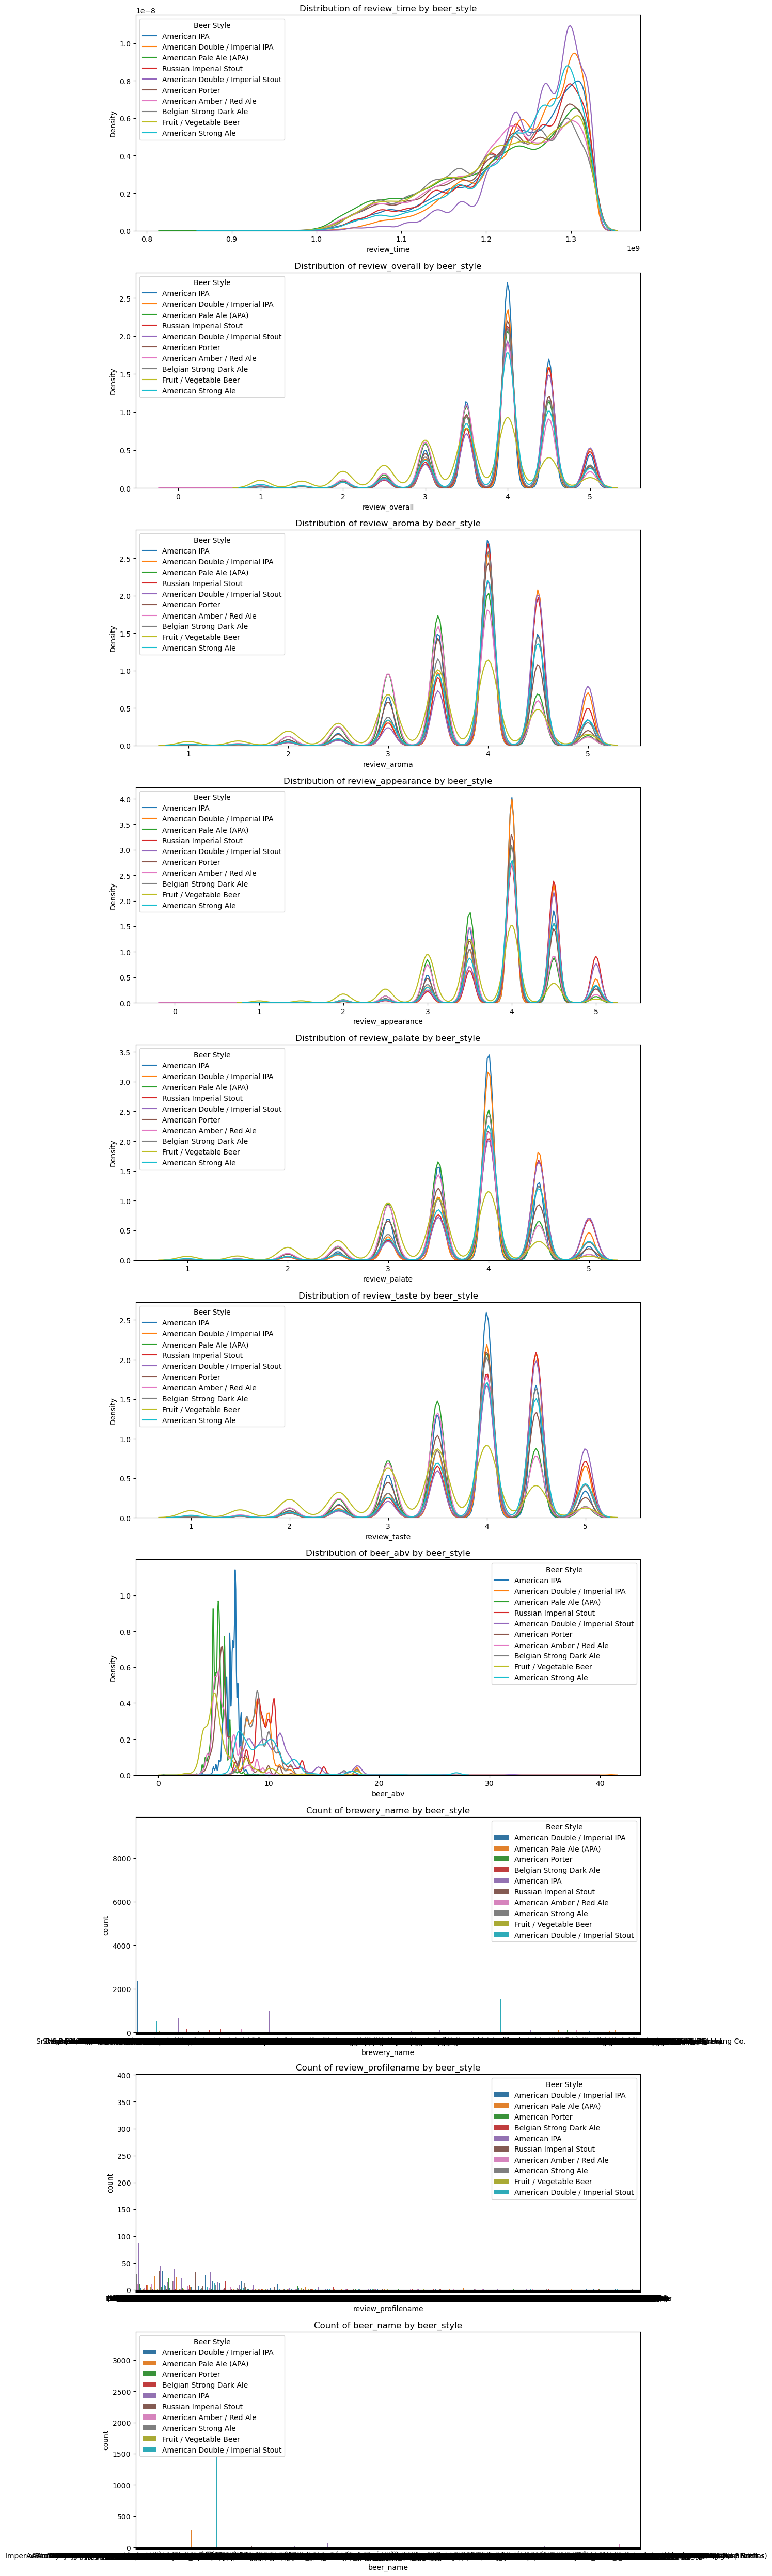

In [15]:
# Very Computationally Expensive - Only Run if you have the power/time

# # Get a list of numeric columns
# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# # Exclude non-relevant columns
# numeric_columns = [col for col in numeric_columns if col not in ['brewery_id', 'beer_beerid']]

# # Get a list of non-numeric columns
# non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# # Exclude non-relevant and target columns
# non_numeric_columns = [col for col in non_numeric_columns if col not in ['brewery_id', 'beer_beerid', 'beer_style']]

# # Determine the number of rows needed for our subplots
# n_rows = len(numeric_columns) + len(non_numeric_columns)

# # Create a subplot for each numeric column
# fig, axs = plt.subplots(n_rows, figsize=(15, n_rows*5))

# # Let's plot for the top N beer styles
# top_styles = df['beer_style'].value_counts().index[:10]

# for ax, col in zip(axs[:len(numeric_columns)], numeric_columns):
#     for style in top_styles:
#         subset = df[df['beer_style']==style]
#         sns.kdeplot(data=subset[col], ax=ax, label=style)
#     ax.set_title(f'Distribution of {col} by beer_style')
#     ax.legend(title='Beer Style')

# for ax, col in zip(axs[len(numeric_columns):], non_numeric_columns):
#     df_subset = df[df['beer_style'].isin(top_styles)]
#     sns.countplot(data=df_subset, x=col, hue='beer_style', ax=ax)
#     ax.set_title(f'Count of {col} by beer_style')
#     ax.legend(title='Beer Style')

# plt.tight_layout()
# plt.show()


<Axes: >

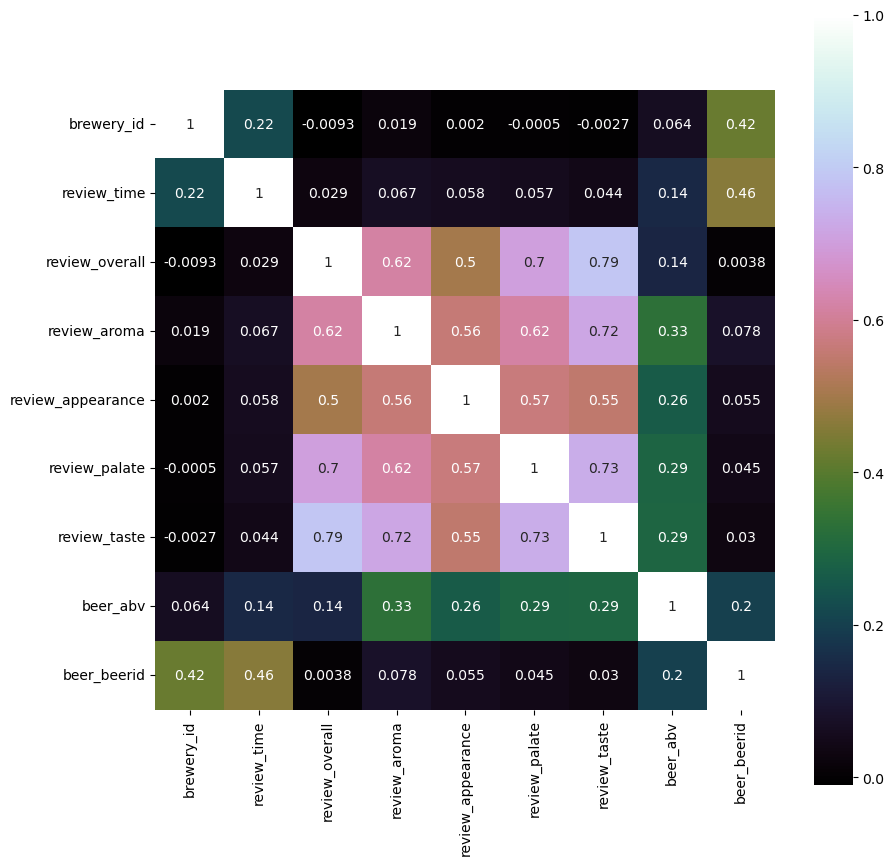

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Compute the correlation matrix
correlation = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')


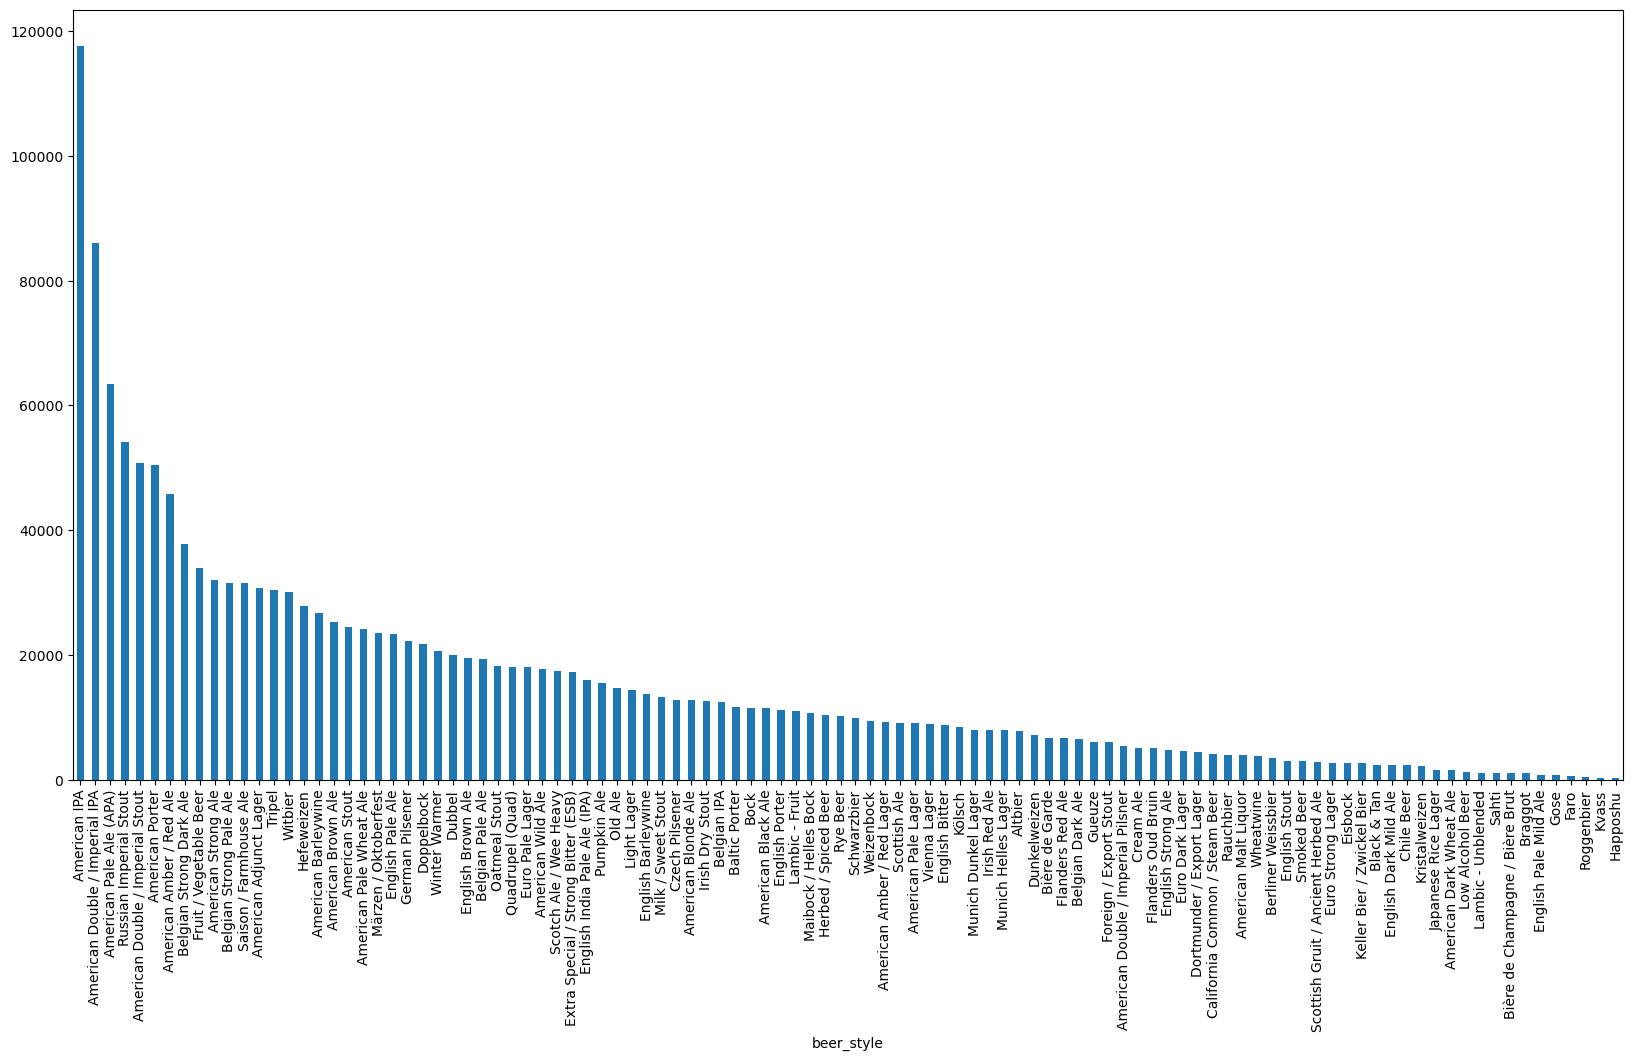

In [20]:
# Distribution of target variable
plt.figure(figsize=(20, 10))  # Set the width to 20 and height to 10
df['beer_style'].value_counts().plot(kind='bar')
plt.show()


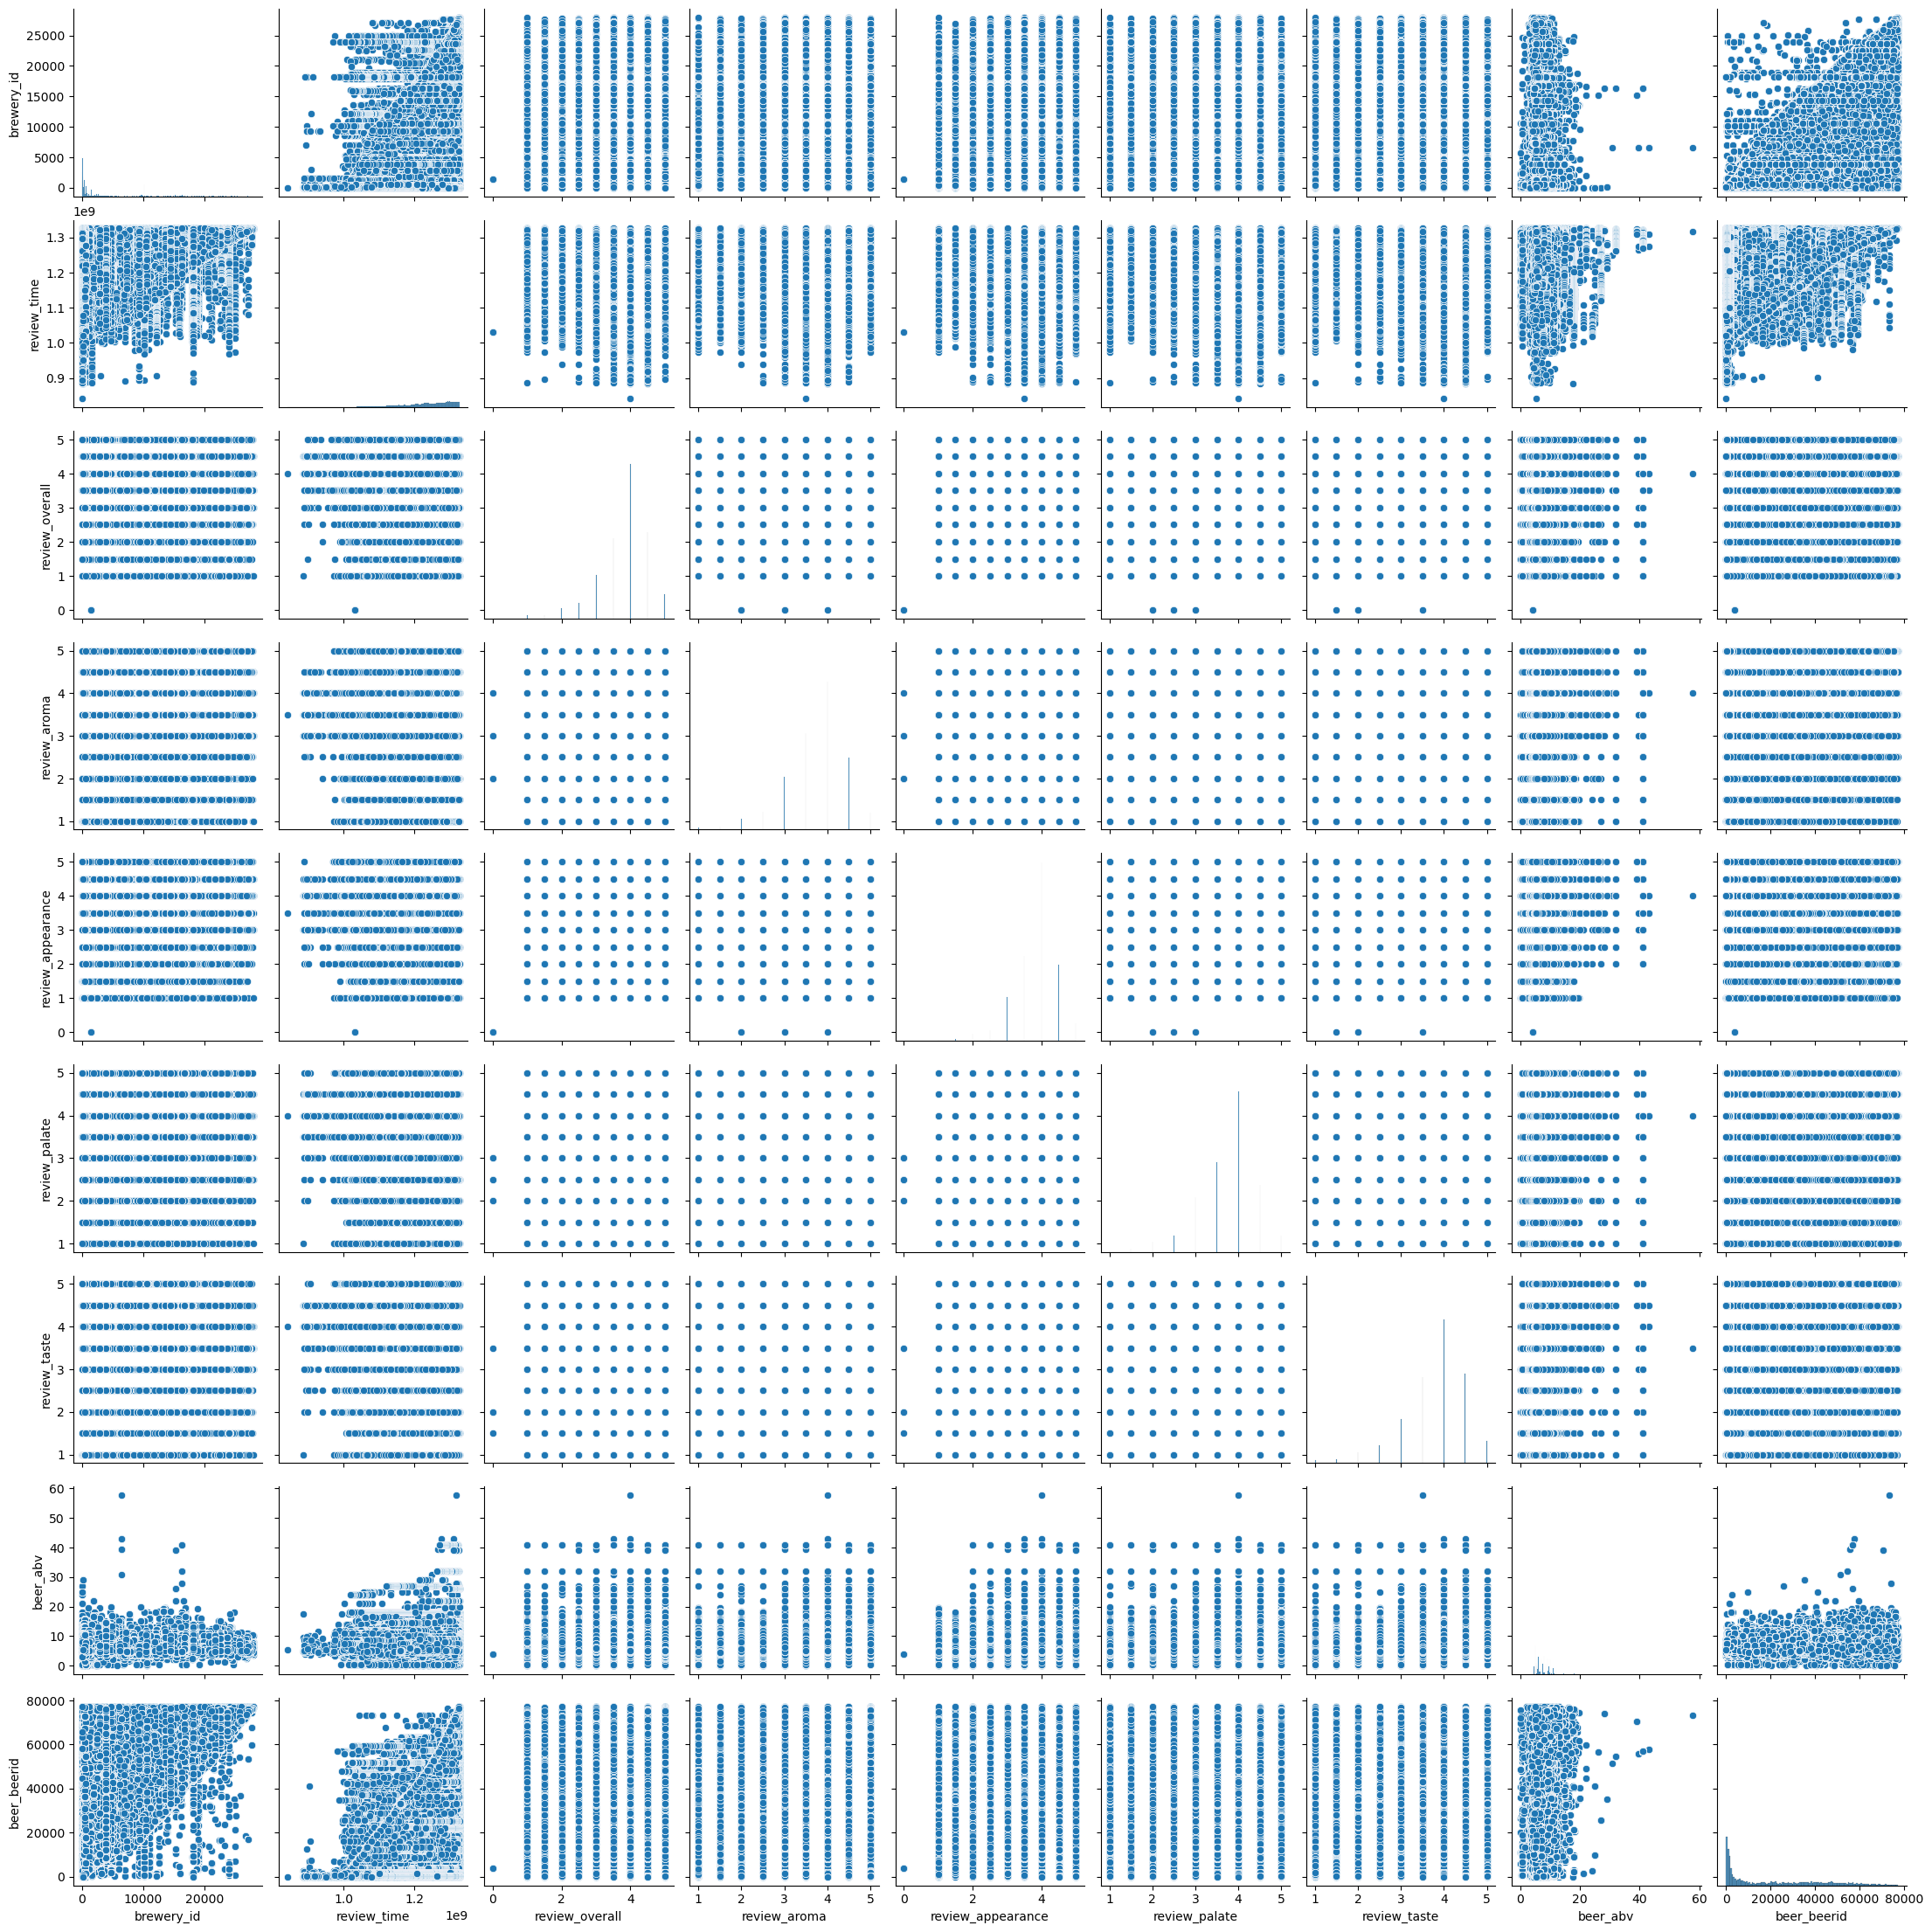

In [22]:
# Pair Plots
sns.pairplot(numeric_df)
    #df[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']])
plt.show()

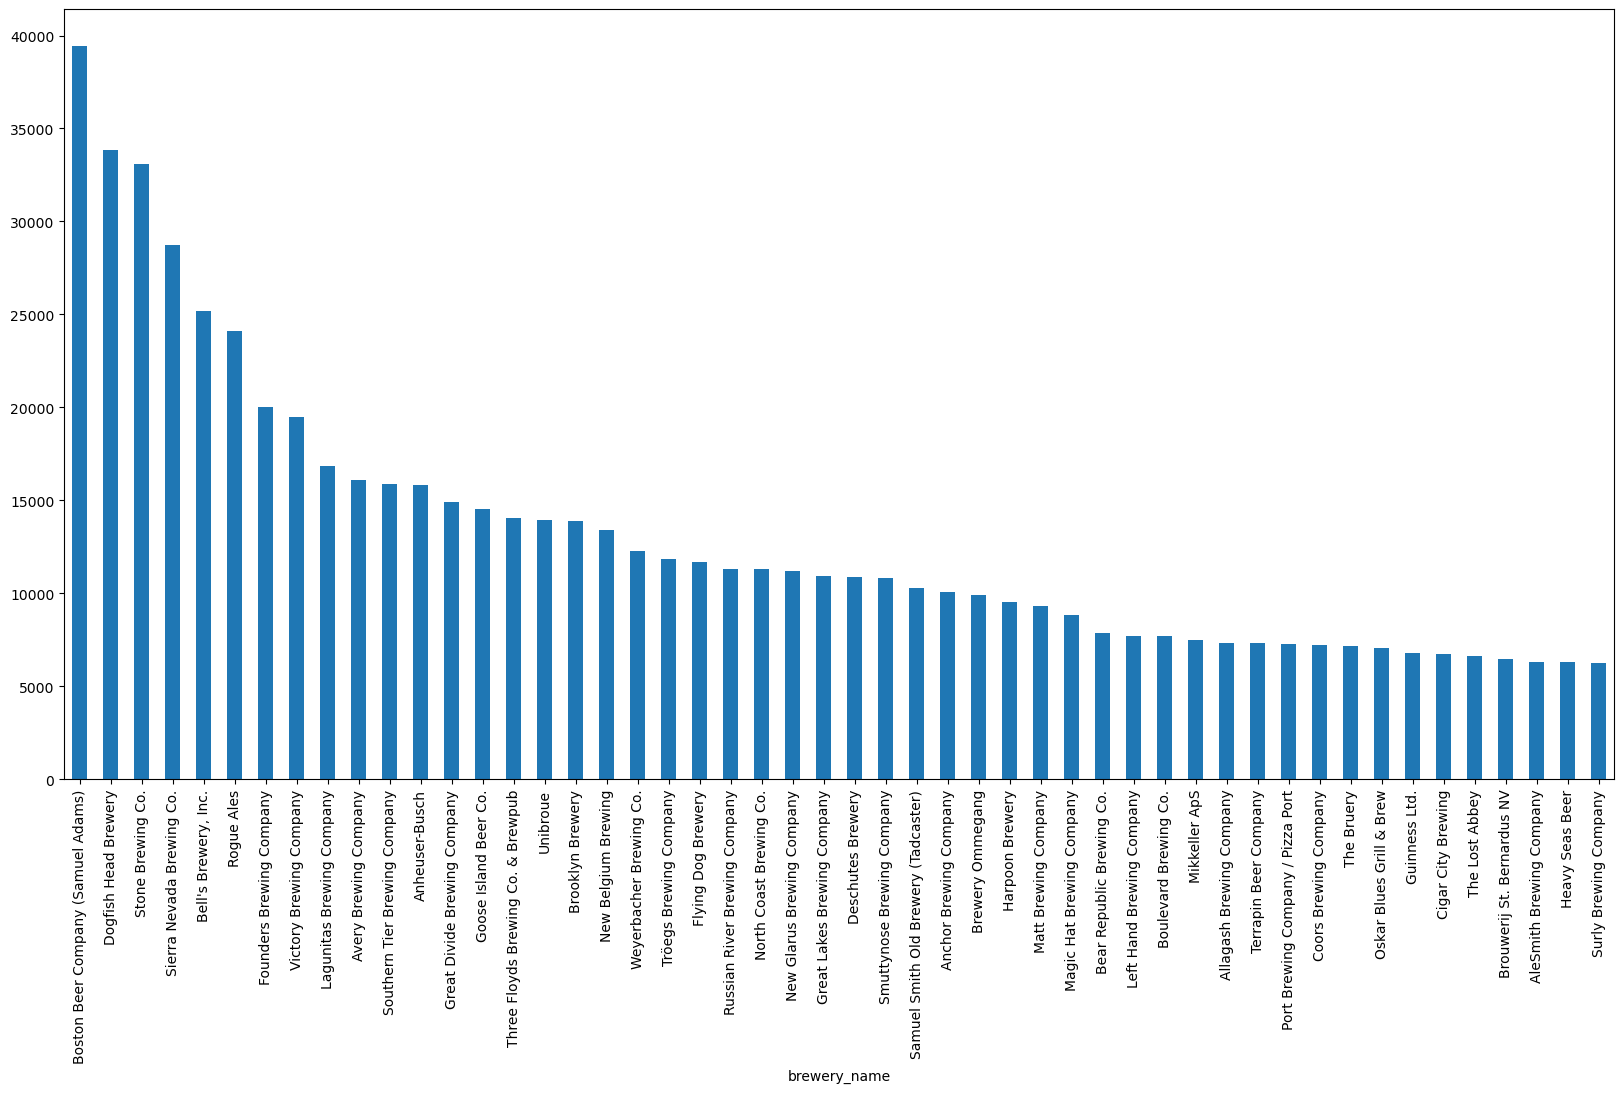

In [30]:
# Example: plot top 10 most common breweries
plt.figure(figsize=(20, 10))
df['brewery_name'].value_counts()[:50].plot(kind='bar')
plt.show()


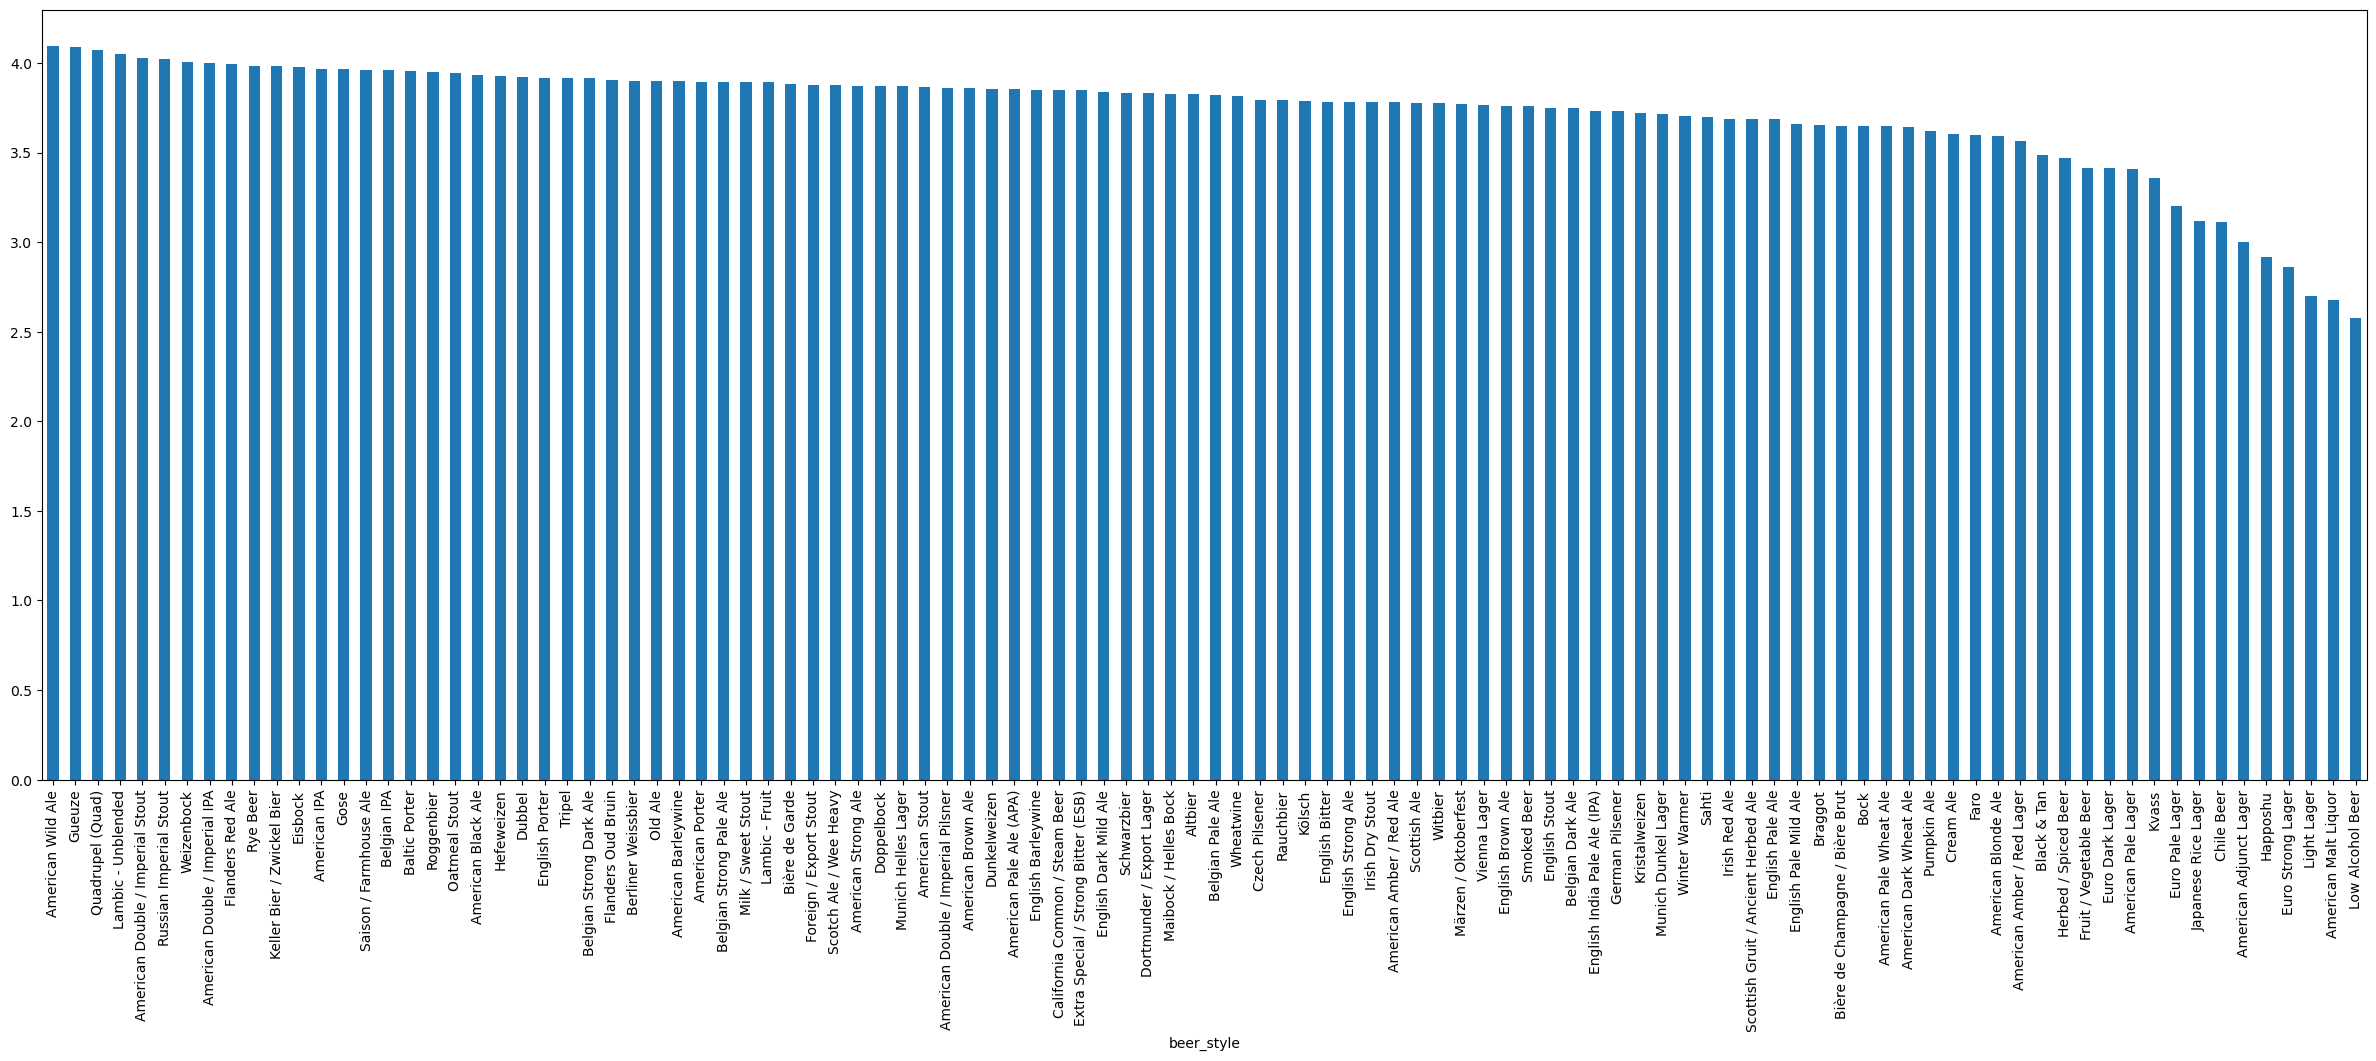

In [27]:
# Example: Average 'review_overall' per brewery
plt.figure(figsize=(30, 10))
grouped_df = df.groupby('beer_style')['review_overall'].mean().sort_values(ascending=False)
grouped_df[:105].plot(kind='bar')  # Show top 10
plt.show()
